In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles_clean.csv to netflix_titles_clean.csv


In [ ]:
data = pd.read_csv('netflix_titles.csv')

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# Drop Columns
data.drop(columns=['show_id', 'cast', 'director', 'description'], inplace=True)

# Replacments
data['country'] = data['country'].fillna(data['country'].mode()[0])

# Drop the rest
data.dropna(inplace=True)

Added Date

In [4]:
# Change Data Type to DateTime
data['date_added'] = pd.to_datetime(data['date_added'].str.strip(), format='mixed', errors='coerce')

NameError: name 'pd' is not defined

Country Column

In [ ]:
# เก็บไว้เฉพาะประเทศแรกจากแต่ละรายการเท่านั้น
data['principal_country'] = data['country'].apply(lambda x: x.split(",")[0])

Rating Ages

In [ ]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

# เปลี่ยนค่าการจัดเรตเป็นกลุ่มอายุที่สอดคล้องกับเรตนั้น
data['ages'] = data['rating'].replace(ratings_ages)
data['ages'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids'], dtype=object)

In [ ]:
data.head()

,type,title,country,date_added,release_year,rating,duration,listed_in,principal_country,ages
0,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,United States,Teens
1,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",South Africa,Adults
2,TV Show,Ganglands,United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",United States,Adults
3,TV Show,Jailbirds New Orleans,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",United States,Adults
4,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",India,Adults


In [ ]:
data.to_csv('netflix_titles_clean.csv', index=False)


In [ ]:
from google.colab import files
files.download('netflix_titles_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df = pd.read_csv('netflix_titles_clean.csv')

In [ ]:
df.head()

,type,title,country,date_added,release_year,rating,duration,listed_in,principal_country,ages
0,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,United States,Teens
1,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",South Africa,Adults
2,TV Show,Ganglands,United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",United States,Adults
3,TV Show,Jailbirds New Orleans,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",United States,Adults
4,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",India,Adults


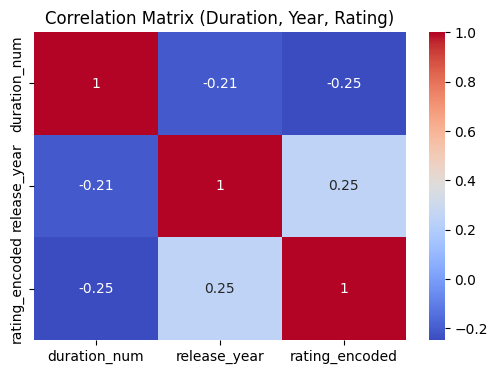

In [ ]:
# Convert categorical 'rating' to numeric via one-hot encoding or label encoding
movies['rating_encoded'] = movies['rating'].astype('category').cat.codes

# Correlation with rating and year
correlation_full = movies[['duration_num', 'release_year', 'rating_encoded']].corr()

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(correlation_full, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Duration, Year, Rating)')
plt.show()
